# PRCP-1027-Skin Disorder prediction

#### Task-1: Prepare a complete data analysis report on the given data.

#### Task-2: Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 

#### Task-3: Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 

##### Dataset Information:

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.The names and id numbers of the patients were recently removed from the database

In [1]:
# import required package to handle the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import and ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# lets import and read the dataset

data=pd.read_csv("dataset_35_dermatology.csv")

# Basic Checks

In [4]:
# read top 5 datapoints
data.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [5]:
# lets read the bottom 5 datapoints
data.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
361                              0                     0   
362                              0                     0   
363                              3                     0   
364                              1                     0   
365                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
361                             0                                    2   
362                             0                                    2   
363                             0                                    2   
364                             0                                    2   
365                             0                                    3   

     band-like_infiltrate  Age  class  
361                     0   25      4  
362                     0   36      4  
363                     3   28      3  
364                     3   50      3  
365                     0   35      1  

[5 rows x 35 columns]

In [6]:
# lets check the shape of data
data.shape

(366, 35)

In [7]:
# lets check how many types of skin diseases are there in the dataset
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

### 1- psoriasis, 2- seborrheic dermatitis, 3- lichen planus, 4- pityriasis rosea, 5- chronic dermatitis, 6- pityriasis rubra pilaris

In [8]:
# chcek the columns
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [9]:
# lets check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

#### no null values
#### all columns are 'int' type except 'Age' is 'objective'

#### typecasting 'Age' column to 'int64' from 'objective'

In [10]:
# lets check unique values present in the 'Age' column
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [11]:
# there is a '?' in the ' Age' columns , lets check how many value are with '?'
data[data['Age'] =='?']

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
262         2        1                 0        2                   0   
263         1        1                 1        3                   0   
264         1        1                 0        2                   0   
265         1        1                 0        3                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
33                   0                   0                         0   
34                   0                   0                         0   
35                   0                   0                         0   
36                   3                   0                         2   
262                  0                   0                         0   
263                  0                   0                         0   
264                  0                   0                         0   
265                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
33                            1                  0  ...   
34                            0                  0  ...   
35                            0                  0  ...   
36                            0                  0  ...   
262                           0                  0  ...   
263                           0                  0  ...   
264                           1                  0  ...   
265                           0                  0  ...   

     disappearance_of_the_granular_layer  \
33                                     0   
34                                     0   
35                                     0   
36                                     0   
262                                    0   
263                                    0   
264                                    0   
265                                    0   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
33                                         0           0   
34                                         0           0   
35                                         0           0   
36                                         2           0   
262                                        0           2   
263                                        0           3   
264                                        0           2   
265                                        0           2   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
33                               0                     0   
34                               0                     0   
35                               0                     0   
36                               2                     0   
262                              0                     0   
263                              0                     0   
264                              0                     0   
265                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
33                              0                                    0   
34                              0                                    0   
35                              0                                    0   
36                              0                                    0   
262                             0                                    3   
263                             0                                    2   
264                             0                                    3   
265                             0                                    3   

     band-like_infil

In [12]:
# lets type cast the 'objective' type 'Age' feature to 'int' type and which automatically changes '?' into nan values

data['Age']=data.loc[data['Age'] != '?', "Age"].astype('int')

In [13]:
# we will have 8 null values as '?' got converted to nan values
data['Age'].isnull().sum()

8

#### replace nan values with the mean of the columm 'Age'

<AxesSubplot:xlabel='Age', ylabel='Density'>

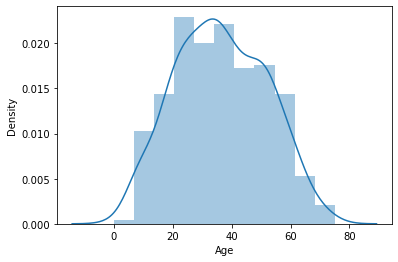

In [14]:
# lets check the distribution of 'Age' feature
sns.distplot(data['Age'])

In [15]:
# since it is almost normal distribution, i would like to replace NaN values with mean

data['Age']=data['Age'].fillna(data['Age'].mean())

In [16]:
# type cast float type to 'int64' type
data['Age']=data['Age'].astype('int64')

In [17]:
# checking central tendencies
data.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  disappearance_of_the_granular_layer  \
count         366.000000  ...                           366.000000   
mean            0.519126  ...                             0.464481   
std             0.905639  ...                             0.864899   
min             0.000000  ...                             0.000000   
25%             0.000000  ...                             0.000000   
50%             0.000000  ...                             0.000000   
75%             1.000000  ...                             1.000000   
max             3.000000  ...                             3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.866120   
std                        0.488723                             0.726108   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                    

* all feartures are ok, except Age is having 0 value

#### imputing Age feature 0 value with it's mean

In [18]:
# lets check how many 0 are there in 'Age' feature
data[data['Age']==0]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
119         1        1                 1        1                   1   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
119                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
119                           2                  2  ...   

     disappearance_of_the_granular_layer  \
119                                    0   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
119                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
119                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
119                             0                                    0   

     band-like_infiltrate  Age  class  
119                     2    0      1  

[1 rows x 35 columns]

In [19]:
# lets replace 0 with mean of the 'Age' when class=1

data.loc[data['Age']==0, 'Age'] =  data.loc[data['class']==1,'Age'].mean()

In [20]:
# lets convert 'Age' feature into 'int' type
data['Age']=data['Age'].astype('int')

In [21]:
# lets check first 5 rows of the data
data.head(3)

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  

[3 rows x 35 columns]

# EDA

### Univariate Analysis

#### erythema:
* skin redness.
#### scaling:
* scaly skin.
#### definite_borders: 
* clear sharp border separating it from its surrounds.
#### itching: 
* unpleasant sensation on the skin that provokes the desire to rub or scratch the area.
####  koebner_phenomenon:
* refers to when people with a specific dermatological disease manifest disease lesions in other skin lesions.
#### polygonal_papules:
* presence of shiny, flat-topped and firm on palpation circumscribed elevations.
#### follicular_papules: 
* presence of skin lesion, less than one centimeter in diameter, circumscribed, elevated, with well-defined borders and solid content
#### oral_mucosal_involvement: 
* presence of skin lesions inside the mouth.
#### knee_and_elbow_involvement: 
* skin lesions in the knee and/or the elbow.
#### scalp_involvement: 
* skin lesions in the scalp.
#### family_history: (0 or 1).
#### age: 
* age of the patient in years.
#### melanin_incontinence: 
* spillage of melanin from the basal keratinocytes into the underlying connective tissue.
#### eosinophils in the infiltrate: 
* bone marrow-derived cells that infiltrate skin and mucous membrane.
#### pnl_infiltrate: 
* pure neuritic leprosy, no skin lesions but larger nerve trunks or their branches are enlarged accompanied with a sensory loss in the areas.
#### fibrosis_of_the_papillary_dermis: 
* excess development of fibrous connective tissue in the papillary dermis.
#### exocytosis: 
* passage to the epidermis of cells foreign to it.
#### acanthosis: 
* Presence of dark, velvety skin areas in body creases.
#### hyperkeratosis: 
* thickening of the outer layer of the skin.
#### parakeratosis:
* a mode of keratinization characterized by the retention of nuclei in the stratum corneum.
#### clubbing_of_the_rete_ridges: 
* the epithelial extensions that project into the underlying connective tissue in both skin and mucous membranes.
#### elongation_of_the_rete_ridges:
* hyperpigmentation of the basal layer in the papillary dermis.
#### thinning_of_the_suprapapillary_epidermis: 
* a thinning of the granular layer at the tips of the papillae.
#### spongiform_pustule: 
* an epidermal pustule formed by infiltration of neutrophils into necrotic epidermis in pustular psoriasis.
#### munro_microabcess: 
* is an abscess in the stratum corneum of the epidermis due to the infiltration of neutrophils from papillary dermis into the epidermal stratum corneum.
#### focal_hypergranulosis:
* is an increased thickness of the stratum granulosum.
#### disappearance_of_the_granular layer: 
* disappearance of the skin granular layer.
#### vacuolisation_and_damage_of_basal_layer:
* presence of vacuolisation and damage of skin basal layer.
#### spongiosis: 
* presence of intercellular edema.
#### saw_tooth_appearance_of_retes: 
* appearance of saw tooth patterns under the skin tissue.
#### follicular_horn_plug: 
* presence of follicular horn plugs
#### perifollicular_parakeratosis: 
* keratinization characterized by the retention of nuclei in tissues surrounding skin follicles.
#### inflammatory_mononuclear_inflitrate:
* increase in the number of infiltrating mononuclear cells in the skin.
#### band_like_infiltrate:
* basal epidermis in a banded pattern.

In [22]:
# lets use sweetviz to analysis the data
import sweetviz as sv
report= sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights/Observations from Univariate Analysis

* in 99% cases whatever the skin diseases erythema is present
* even in 98% cases scaling is present in all the skin diseases
* definite border is not present in the 16% cases when diagnosed with skin diseases
* in 32% cases there are no itching symptoms present
* koebner_phenomenon is not present in 61% cases and only 39% cases it is present
* polygonal_papules is not present in 81% cases
* follicular_papules is present in very rare cases i.e 19%, we have to check with target that when it is present
* Even oral_mucosal involvement is not present in 82% cases
* knee_and_elbow_involvement is present in 39% cases only
* 72% cases doesn't have any scalp related symptoms
* 87% cases disease not observed in the family history 
* melanin_incontinence is not found in 81% cases and only in 19% cases it is found
* eosinophils_in_the_infiltrate not found in 89% cases
* fibrosis_of_the_papillary_dermis is not found in 85% cases
* exocytosis found in 68% cases with any one skin disorder
* acanthosis is present in almost all the cases except few cases
* clubbing_of_the_rete_ridges is not found in 69% cases
* elongation_of_the_rete_ridges found in half of the cases and not found in half cases 
* thinning_of_the_suprapapillary_epidermis is happening in 70% cases
* spongiform_pustule,munro_microabcess,focal_hypergranulosis symptomsa present in 80% cases
* in 25% cases the_granular_layer got disappeared
* basel layer got damaged in 80% cases
* saw-tooth_appearance_of_retes is not appeared in 80% cases
* follicular_horn_plug and perifollicular_parakeratosis not present in 94% cases
* 96% cases having symptoms of inflammatory_monoluclear_inflitrate
* Age is normally distributed and it is having high relation with target class
* band_like_infiltrate is not present in 79% of cases

In [23]:
# lets check how many categories are there in Target
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [24]:
# lets check the distribution of Target classes
import plotly.express as px
values=data['class'].value_counts()
names=["psoriasis","lichen planus","seborrheic dermatitis",'chronic dermatitis',"pityriasis rosea",'pityriasis rubra pilaris']
fig=px.pie(data, values=values, names=names, title="Target distribution")
fig.show()

#### we can see most cases are 'psoriasis' with 30.6%, and then 'lichen planus' with 19.7% and least skin diseases cases are 'pityriasis rubra pilaris'

### Bivariate analysis

In [25]:
# lets split entire 33(except 'Age') features into two lists
cols1=['erythema', 'scaling', 'definite_borders', 'itching','koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis']
cols2= ['hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']

In [26]:
print( len(cols1))
print(len(cols2))

17
16


In [27]:
# lets check count of each disease
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

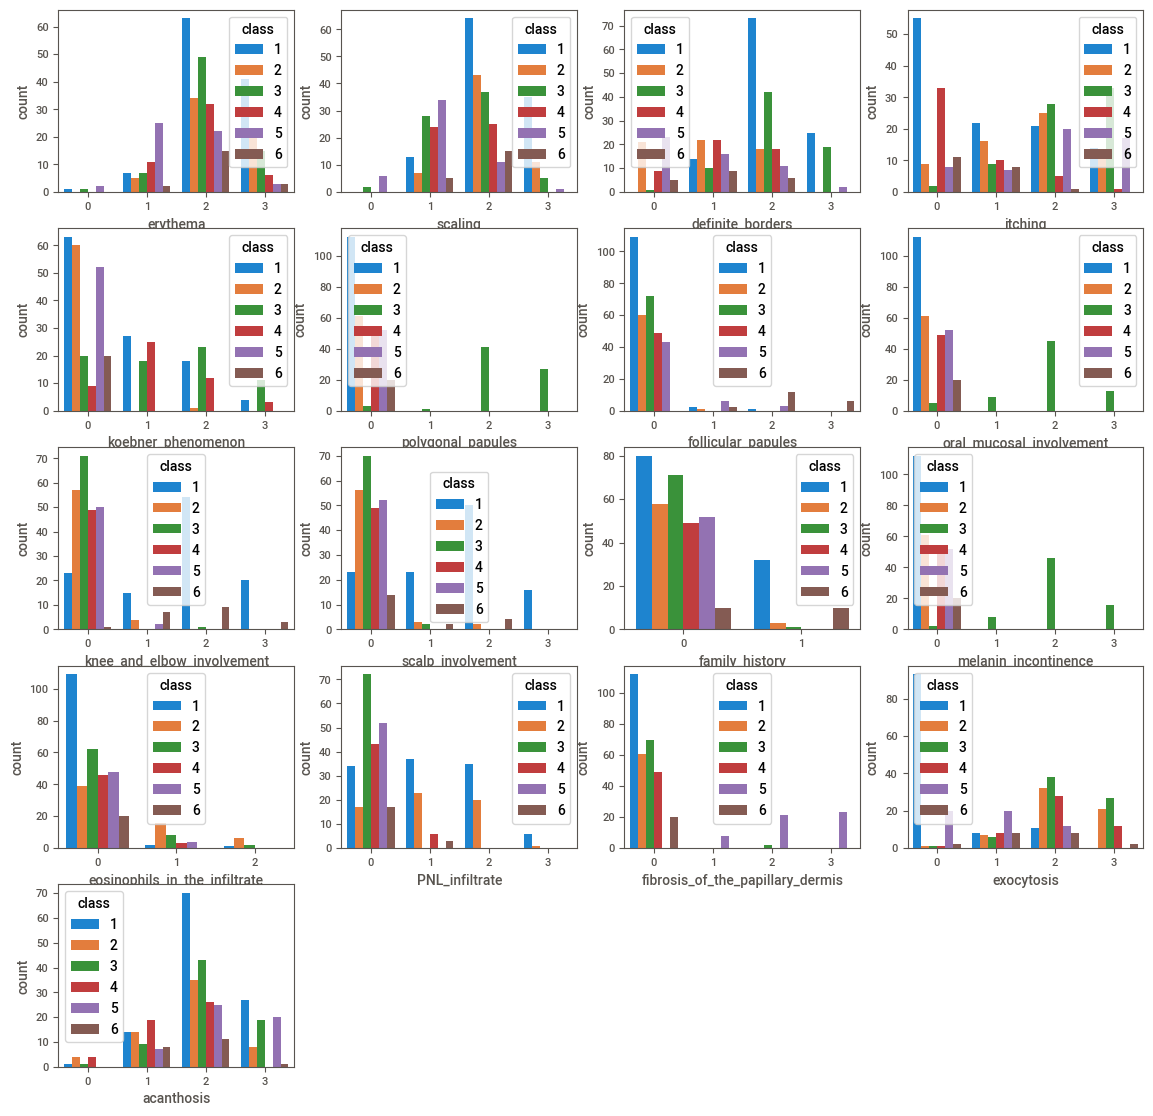

In [28]:
# since all the features are categorical i would like to plot countplot

plt.figure(figsize=(14,14))
plt_num = 1

for c in cols1:
    ax=plt.subplot(5,4, plt_num)
    sns.countplot(x=data[c], hue=data['class'])
    plt.xlabel(c)
    plt_num += 1
plt.show()

### Insights/Obervations from Bi-Variate analysis:

* erythema and scaling is present in almost all the cases
* definite border type-3 symptoms are not present when diseases is calss 2/4/6
* itching is not present in 60 class-1(psoriasis) cases, i can say 50%-50% cases it is present
* koebner_phenomenon mostly not present in calss-2,5 & 6 skin diseases
* polygonal_papules present in most of the cases when skin disease is class-3, and not present in the rest of the class
* follicular_papules is present in all cases when disease is class-6, and not present mostly in other class
* oral_mucosal_involvement is there in most of the cases when skin disease is class-3, and not present in other class diseases
* in very very less cases knee_and_elbow_invovement there when disease is class-2,3,4& 5, in class-1&6 it is present
* class-4&5 skin disease dont have scalp related symptoms
* when disease is class-6 , 50% cases it is having family history with disease and class-4&5 diseases doesn't have any family history with disease
* melanin_incontinence is present only in class-3 skin disease only, not present in anyother class
* when disease is class-1&6, there are very very less symptoms of eosinophils_in_the_infiltrate
* PNL_infiltrate is not present in class-3&5, and in very less cases it is observed when disease is class-4&6.
* fibrosis_of_the_papilary_dermis is present in all the cases when disease is class-5, not completely not present in class-1,2,4 &6 , in very very less cases it is present when class-3 skin disease
* exocytosis is present in all the cases except in calss-1 it is present in very less cases.
* acanthosis symptom found in all the classes

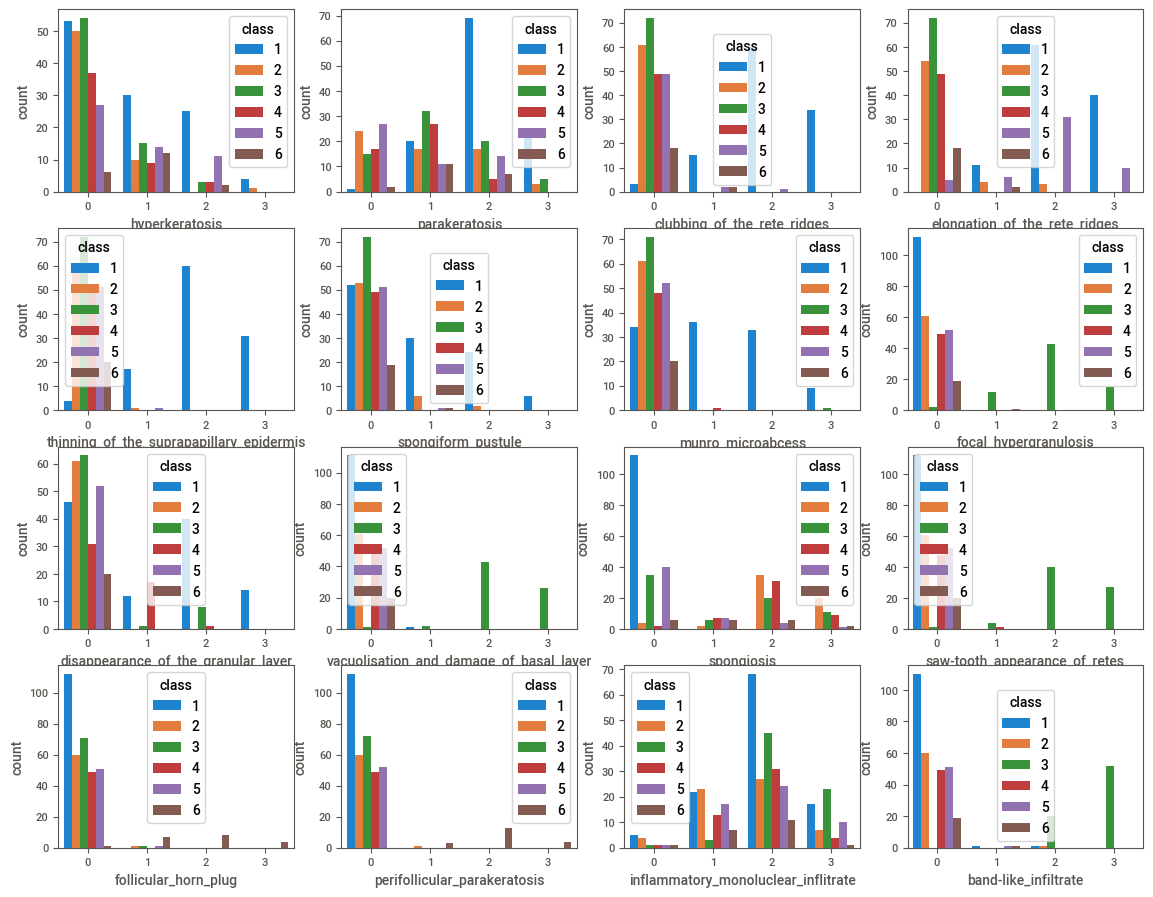

In [29]:
# since all the features are categorical i would like to plot countplot

plt.figure(figsize=(14,14))
plt_num = 1

for c in cols2:
    ax=plt.subplot(5,4, plt_num)
    sns.countplot(x=data[c], hue=data['class'])
    plt.xlabel(c)
    plt_num += 1
plt.show()

### Insights/Obervations from Bi-Variate analysis:

* hyperkeratosis almost found in all the skin diseases
* when disease is class-1 , parakertosis present in most cases, and remaining classes also it is present
* clubbing of rete_ridges found only in class- 1,5 &6
* elongation_of_the_rete_ridges present in all the cases when disease is class-1, and not found when class-3&4
* thinning_of_the_suprapapillary_epidermis is found in almost all the cases in class-1 disease, and not found mostly in other class disease
* spongiform_pustule are present in only class-1&2 skin disease
* munro_microabcess is present in class-1 skin disease only and in class-3&4 very very less cases it is present
* focal_hypergranulosis is only present in class-3 skin disease
* disappearance_of_the_granular_layer is not present in class-2,5&6 skin diseases
* vacuolisation_and_damage_of_basal_layer range of 2&3 present only in class-3 skin disease
* spongiosis is not present in class-1 skin disease
* saw-tooth_appearance_of_retes range of 2&3 present only in class-3 skin disease and range-1 present only on class-3&4
* follicular_horn_plug & perifollicular_parakeratosis are almost present in all cases of class-6 skin disease only
* inflammatory_monoluclear_inflitrate is present in all skin diseases
* band-like_infiltrate is present in all class-3 skin diseases

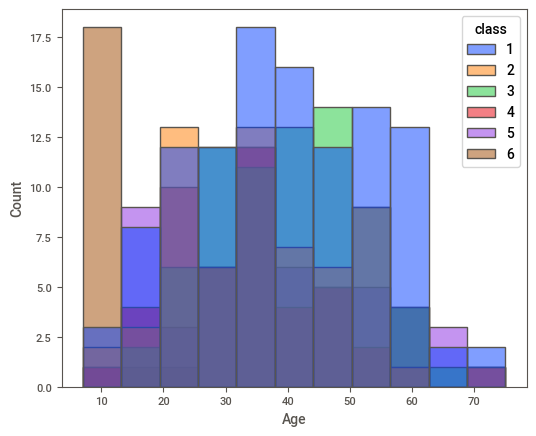

In [30]:
# age distribution vs skin disease classes
plt.figure(figsize=(6,5))

sns.histplot(x=data['Age'], hue=data['class'], palette='bright')
plt.show()

#### Insights from Age vs Target features

* class-6 skin disease is infecting mostly in the age group of 5 to 15 
* class-1 disease is more when age more then 30 years

### Multivariate Analysis

In [31]:
# sns.pairplot(data)

* since pair plot can't be intuitive here , i have taken few references by zooming into pair plot and found relation betweeen few features

In [32]:
# few columns may have relation with eachother
multi=data[['perifollicular_parakeratosis','koebner_phenomenon','oral_mucosal_involvement',
            'clubbing_of_the_rete_ridges','melanin_incontinence','follicular_papules']]

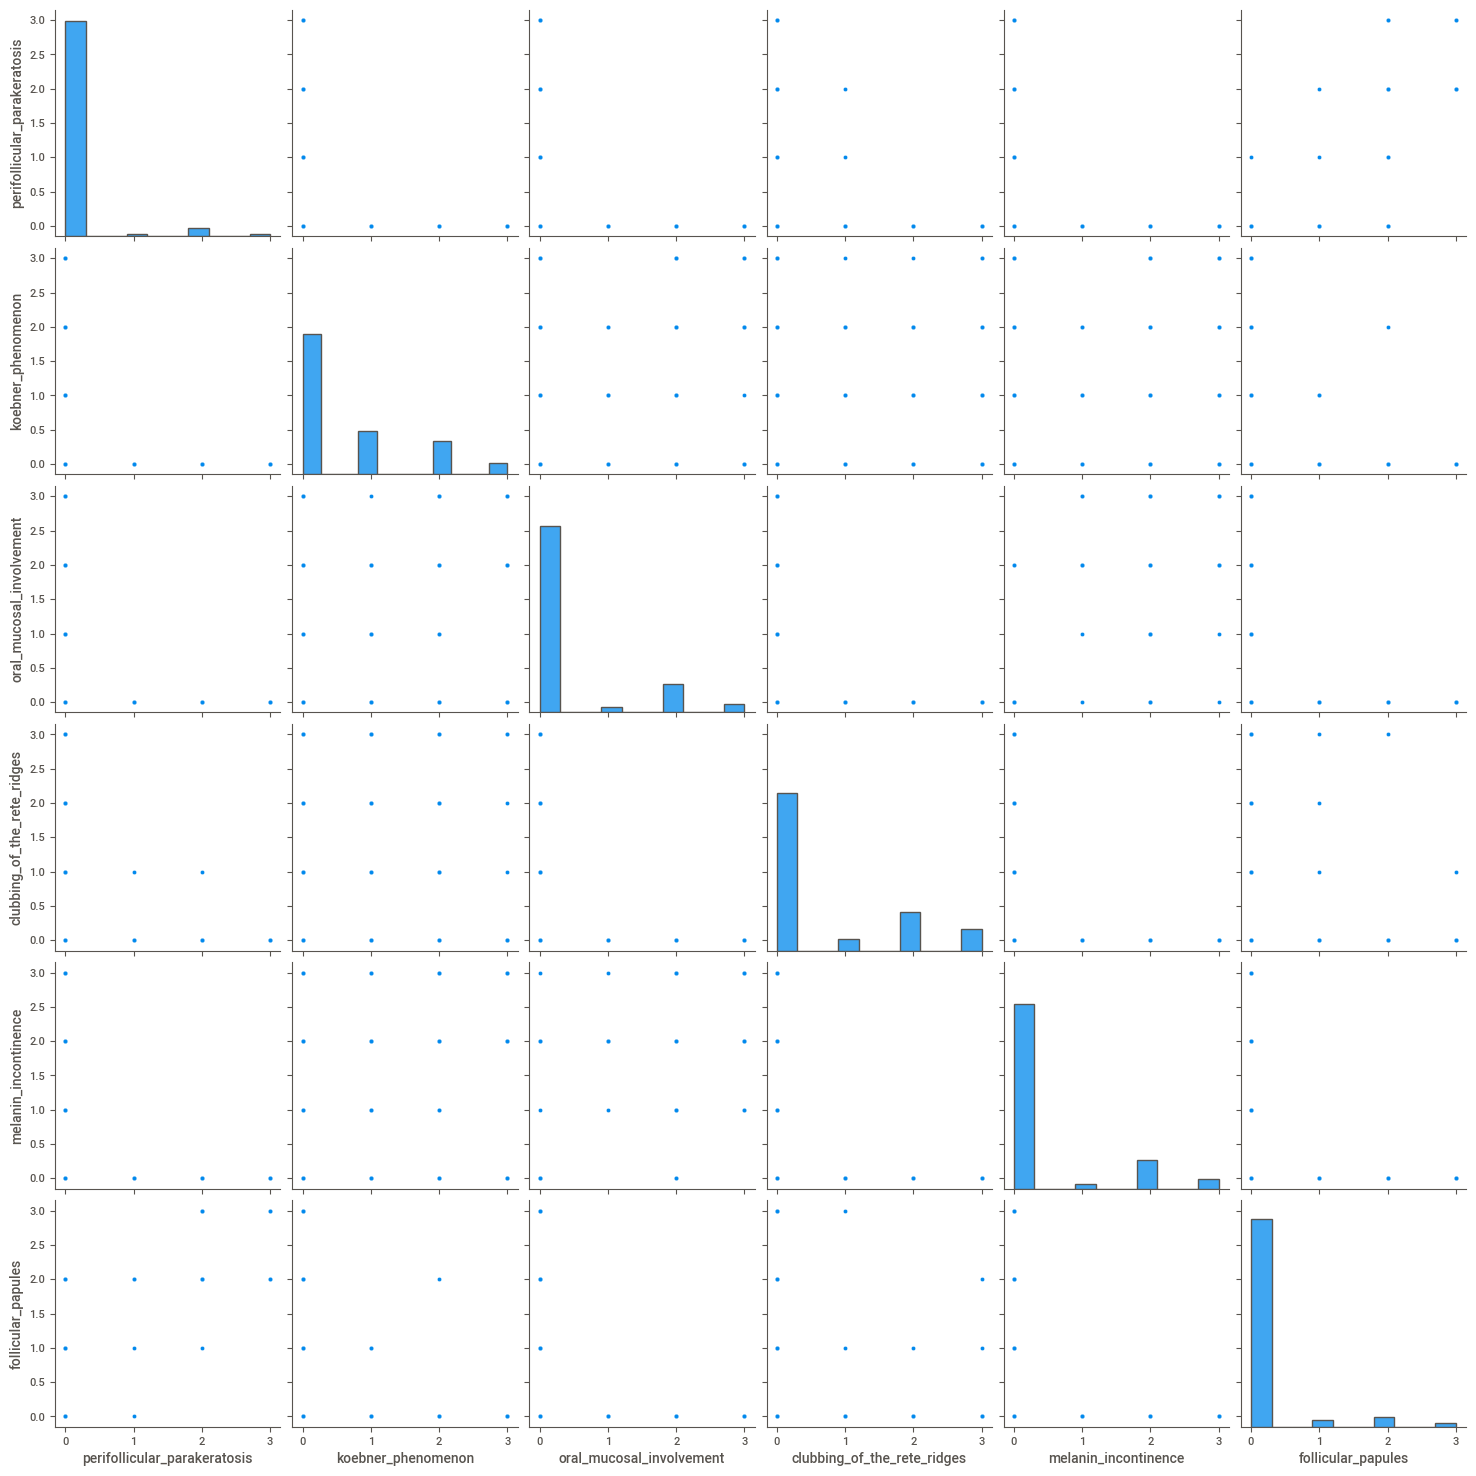

In [33]:
# lets plot pairplot to get relation
sns.pairplot(multi)

### Insights/Obervations from Multivariate analysis:

* people is having either symptoed with 'perifollicular_parakeratosis' or 'koebner_phenomenon' but not both in common
* people is having either symptoed with 'perifollicular_parakeratosis' or 'oral_mucosal_involvement' but not both in common
* people is having either symptoed with 'perifollicular_parakeratosis' or 'melanin_incontinence' but not both in common
* people is having either symptoed with 'clubbing_of_the_rete_ridges' or 'melanin_incontinence' but not both in common
* people is having either symptoed with 'clubbing_of_the_rete_ridges' or 'oral_mucosal_involvement' but not both in common
* people is having either symptoed with 'follicular_papules' or 'oral_mucosal_involvement' but not both in common
* people is having either symptoed with 'follicular_papules' or 'melanin_incontinence' but not both in common 

# Data Preprocessing

### Treating/imputing Null values/missing values

In [34]:
# lets check null values in the data
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

* There are no null values, though there are missing values in Age and i have treated it earlier

#### there are no categorical('objective') features to encode

### Outliers treating

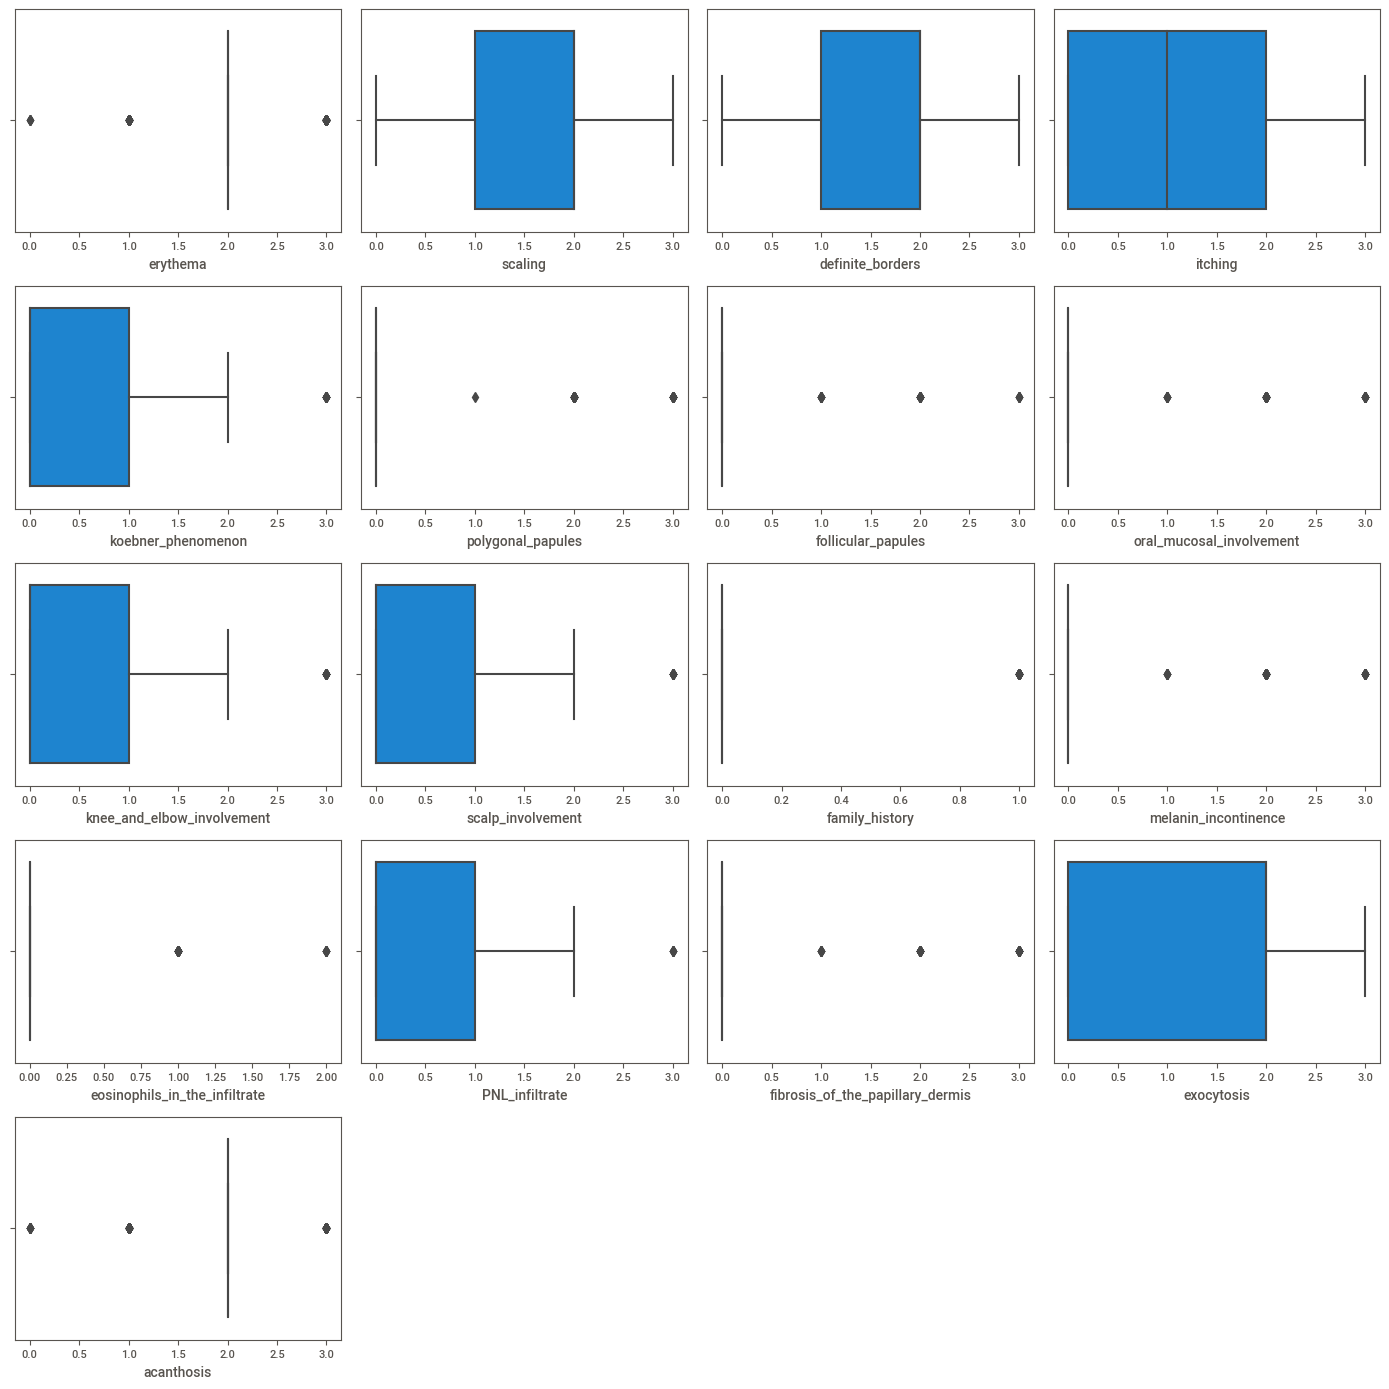

In [35]:
# lets check outliers for first 17 categories
plt.figure(figsize=(14,14))
plt_num = 1

for c in cols1:
    ax=plt.subplot(5,4, plt_num)
    sns.boxplot(x=data[c])
    plt.xlabel(c)
    plt_num += 1
plt.tight_layout()
plt.show()

#### If 'erythema's outliers Not treated SVM & KNN model performance getting improved , so not doing it

In [36]:
# as per my understanding erythema will be present in all the skin disease cases , so i will be imputing 0 with mode of erythema
# data.loc[data['erythema']==0,'erythema'] =data['erythema'].mode()[0]

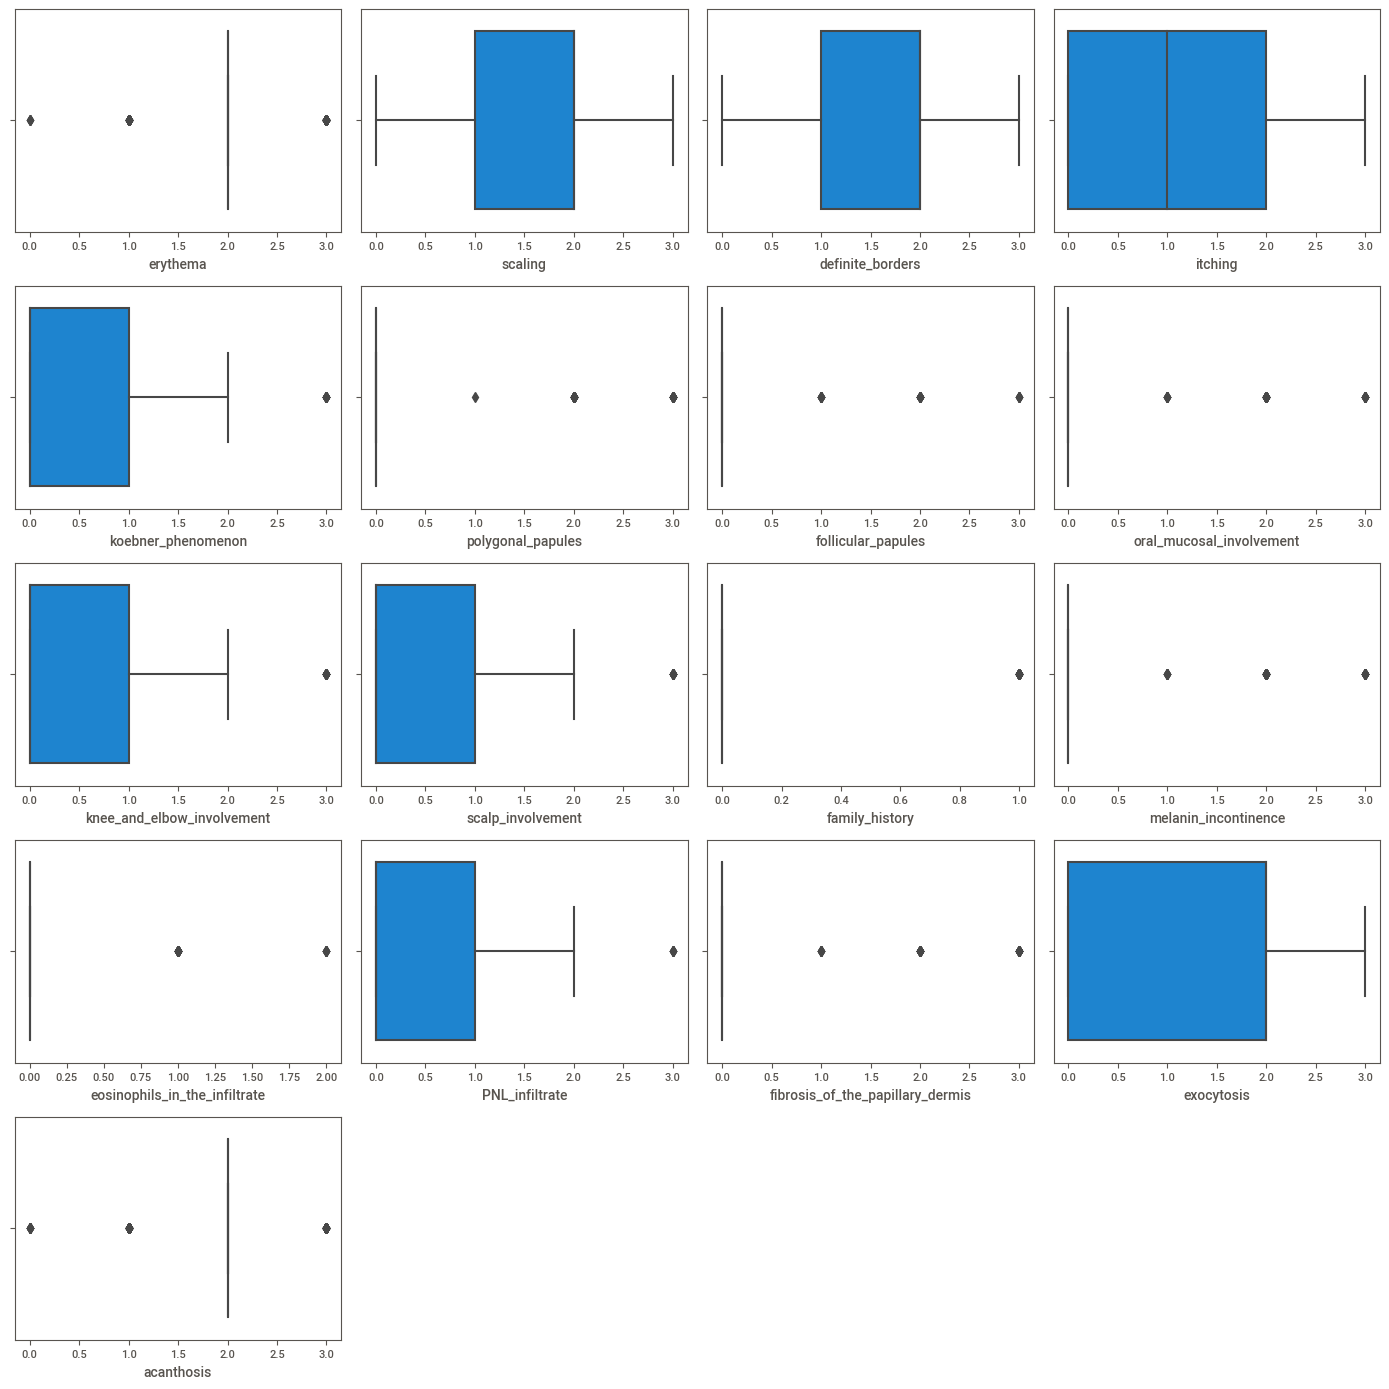

In [37]:
# lets check outliers for first 17 categories
plt.figure(figsize=(14,14))
plt_num = 1

for c in cols1:
    ax=plt.subplot(5,4, plt_num)
    sns.boxplot(x=data[c])
    plt.xlabel(c)
    plt_num += 1
plt.tight_layout()
plt.show()

* koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate,PNL_infiltrate, fibrosis_of_the_papillary_dermis, acanthosis are having multile categorical data, they might have small counts for fewer categories but these are not outliers and theses are essential data.

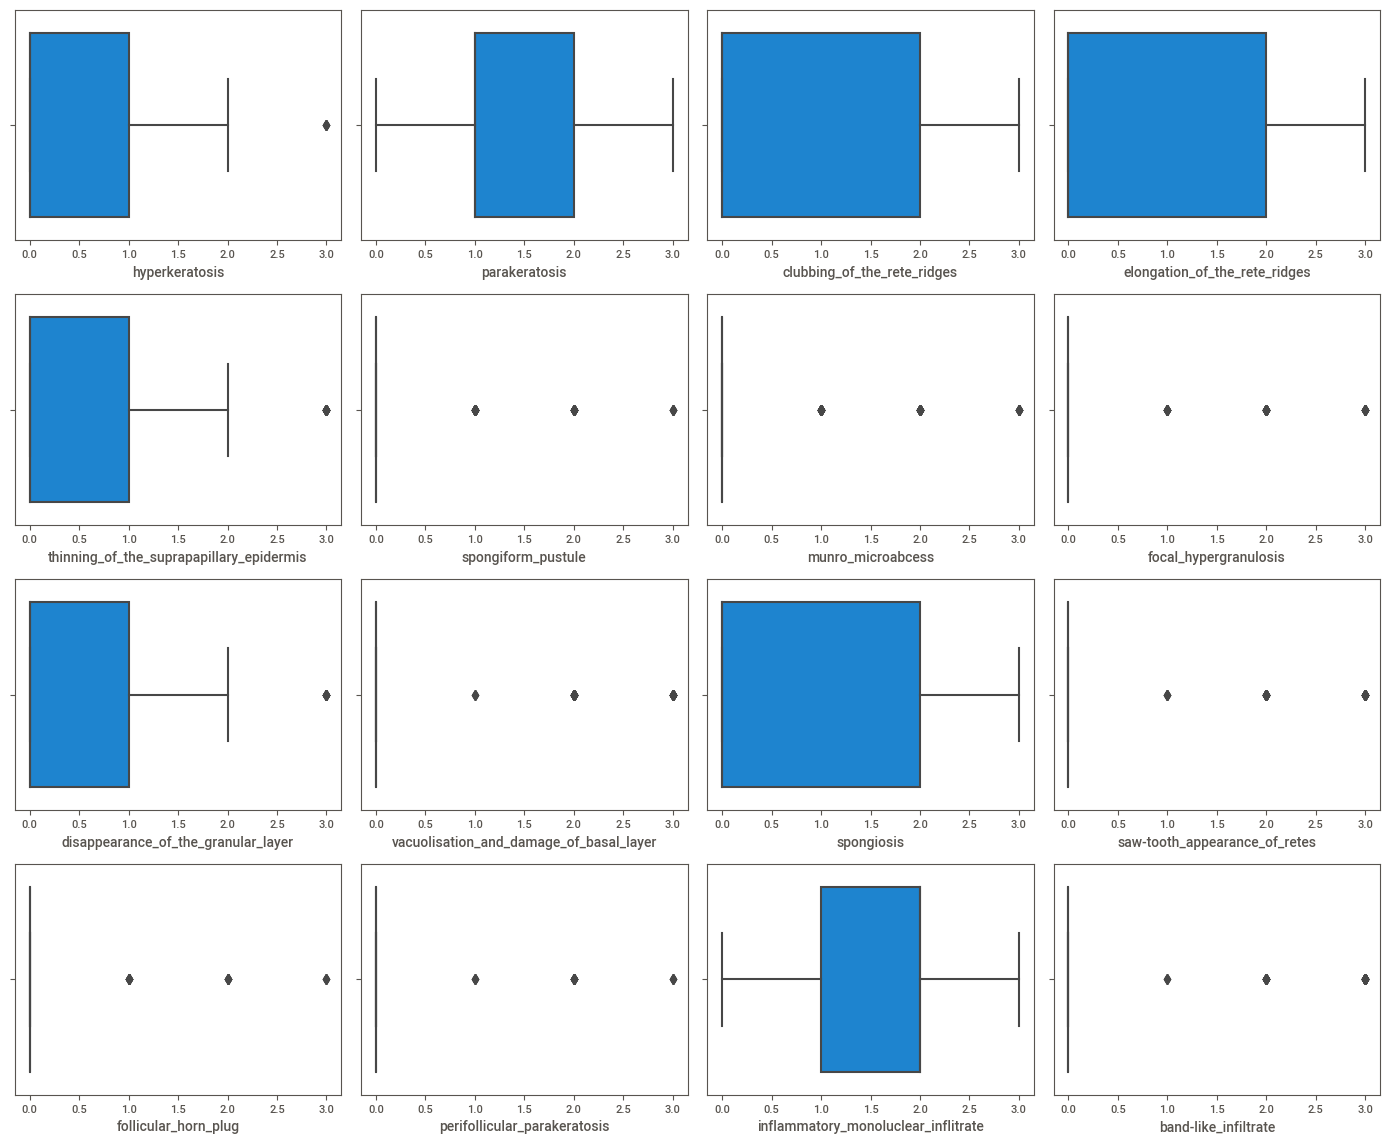

In [38]:
# lets check outliers for remaining 17 categories
plt.figure(figsize=(14,14))
plt_num = 1

for c in cols2:
    ax=plt.subplot(5,4, plt_num)
    sns.boxplot(x=data[c])
    plt.xlabel(c)
    plt_num += 1
plt.tight_layout()
plt.show()

* these are not outliers as per my underastanding with the domain knowledge, these data points are essential data

# Feature Selection

In [39]:
# lets check duplicated rows 
data.duplicated().sum()

0

In [40]:
# lets check correlation between features
data.corr()

erythema   scaling  \
erythema                                  1.000000  0.435467   
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                        0.000694 -0.010576   
polygonal_papules                         0.033571 -0.075035   
follicular_papules                       -0.109550 -0.092400   
oral_mucosal_involvement                 -0.026810 -0.082969   
knee_and_elbow_involvement                0.141008  0.298398   
scalp_involvement                         0.186684  0.301577   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
PNL_infiltrate                            0.224095  0.282486   
fibrosis_of_the_papillary_dermis         -0.354595 -0.383585   
exocytosis                                0.021565 -0.110809   
acanthosis                                0.064165  0.108095   
hyperkeratosis                           -0.055432  0.013149   
parakeratosis                             0.210030  0.296752   
clubbing_of_the_rete_ridges               0.157558  0.320740   
elongation_of_the_rete_ridges             0.007819  0.139073   
thinning_of_the_suprapapillary_epidermis  0.167868  0.330343   
spongiform_pustule                        0.169773  0.297783   
munro_microabcess                         0.113464  0.186366   
focal_hypergranulosis                    -0.013761 -0.085021   
disappearance_of_the_granular_layer       0.159100  0.211484   
vacuolisation_and_damage_of_basal_layer   0.002559 -0.109523   
spongiosis                                0.022468  0.012151   
saw-tooth_appearance_of_retes            -0.005779 -0.114467   
follicular_horn_plug                     -0.005450 -0.010518   
perifollicular_parakeratosis              0.009539 -0.011135   
inflammatory_monoluclear_inflitrate       0.075758 -0.010977   
band-like_infiltrate                     -0.006955 -0.132079   
Age                                      -0.016145  0.008237   
class                                    -0.335537 -0.468688   

                                          definite_borders   itching  \
erythema                                          0.260087 -0.047623   
scaling                                           0.357987 -0.084197   
definite_borders                                  1.000000 -0.062564   
itching                                          -0.062564  1.000000   
koebner_phenomenon                                0.241342  0.267878   
polygonal_papules                                 0.327754  0.409696   
follicular_papules                               -0.166662 -0.144825   
oral_mucosal_involvement                          0.286684  0.359163   
knee_and_elbow_involvement                        0.302309 -0.299645   
scalp_involvement                                 0.268862 -0.155639   
family_history                                    0.115844 -0.136615   
melanin_incontinence                              0.311398  0.359207   
eosinophils_in_the_infiltrate                    -0.132021  0.095434   
PNL_infiltrate                                    0.041330 -0.145288   
fibrosis_of_the_papillary_dermis                 -0.274414  0.203032   
exocytosis                                       -0.205391  0.214822   
acanthosis                                        0.189761  0.067080   
hyperkeratosis                                    0.043894 -0.008460   
parakeratosis                                     0.361213 -0.075568   
clubbing_of_the_rete_ridges                       0.387205 -0.232224   
elongation_of_the_rete_ridges                     0.201702 -0.124058   
thinning_of_the_suprapapillary_epidermis          0.369266 -0.244052   
spongiform_pustule                                0.246204 -0.152689   
munro_mic

<AxesSubplot:>

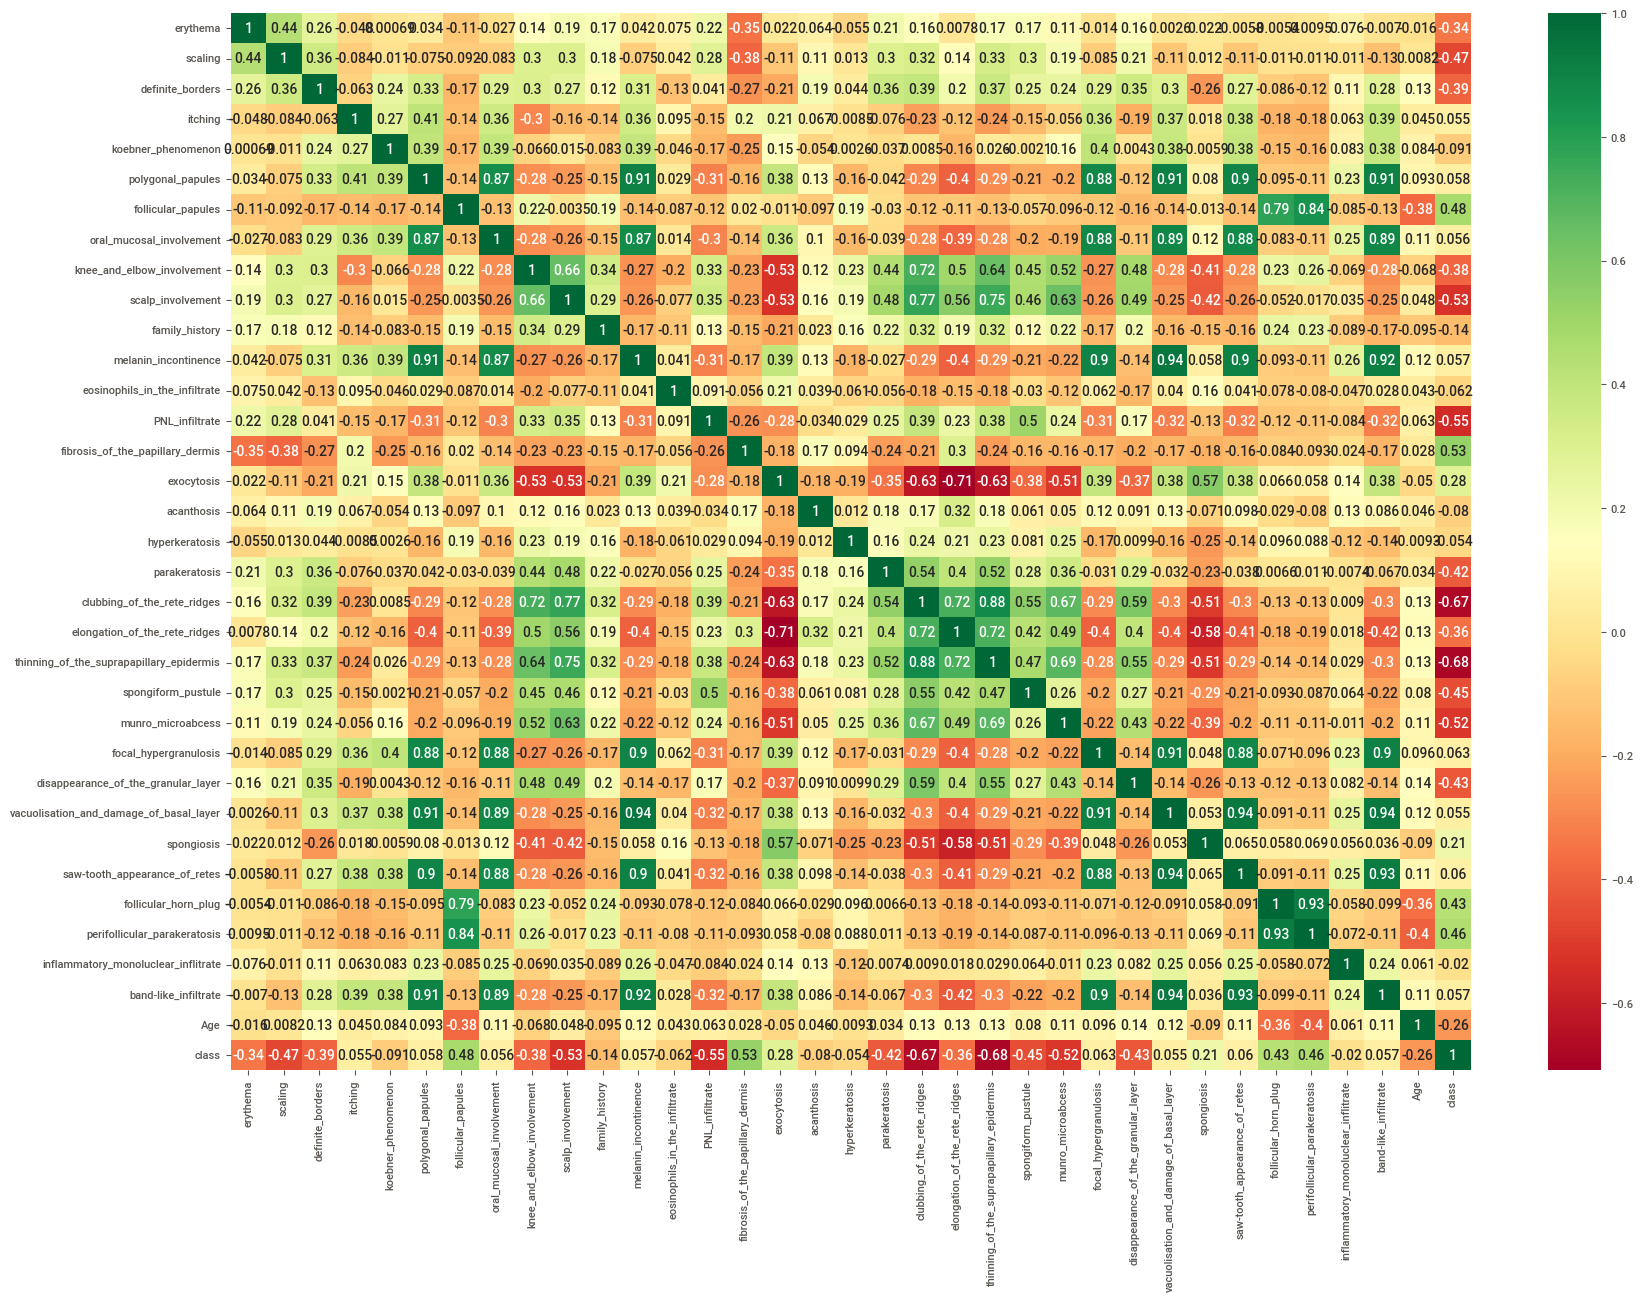

In [41]:
# plotting Heatmap to check correlation
plt.figure(figsize=(20,14))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

* polygonal_papules,melanin_incontinence, saw-tooth_appearance_of_retes, focal_hypergranulosis, vacuolisation_and_damage_of_basal_layer and band-like_infiltrate having more than 0.9 correlation so i will drop one by one column based on their lowest correlation with target and check relation.
* follicular_horn_plug and perifollicular_parakeratosis having 0.93 correlation with eachother and follicular_horn_plug having less correlation with target, so i will drop this feature

## Note: I have tested models with and without removing Higly correlated features, models performing almost same in both the cases, so i would like to go by removing High correlated Features

In [42]:
# dropping features with more correlation with independent variables and less correlation with target variable
data=data.drop(['melanin_incontinence','follicular_horn_plug','vacuolisation_and_damage_of_basal_layer',
                   'band-like_infiltrate','polygonal_papules'], axis=1)

<AxesSubplot:>

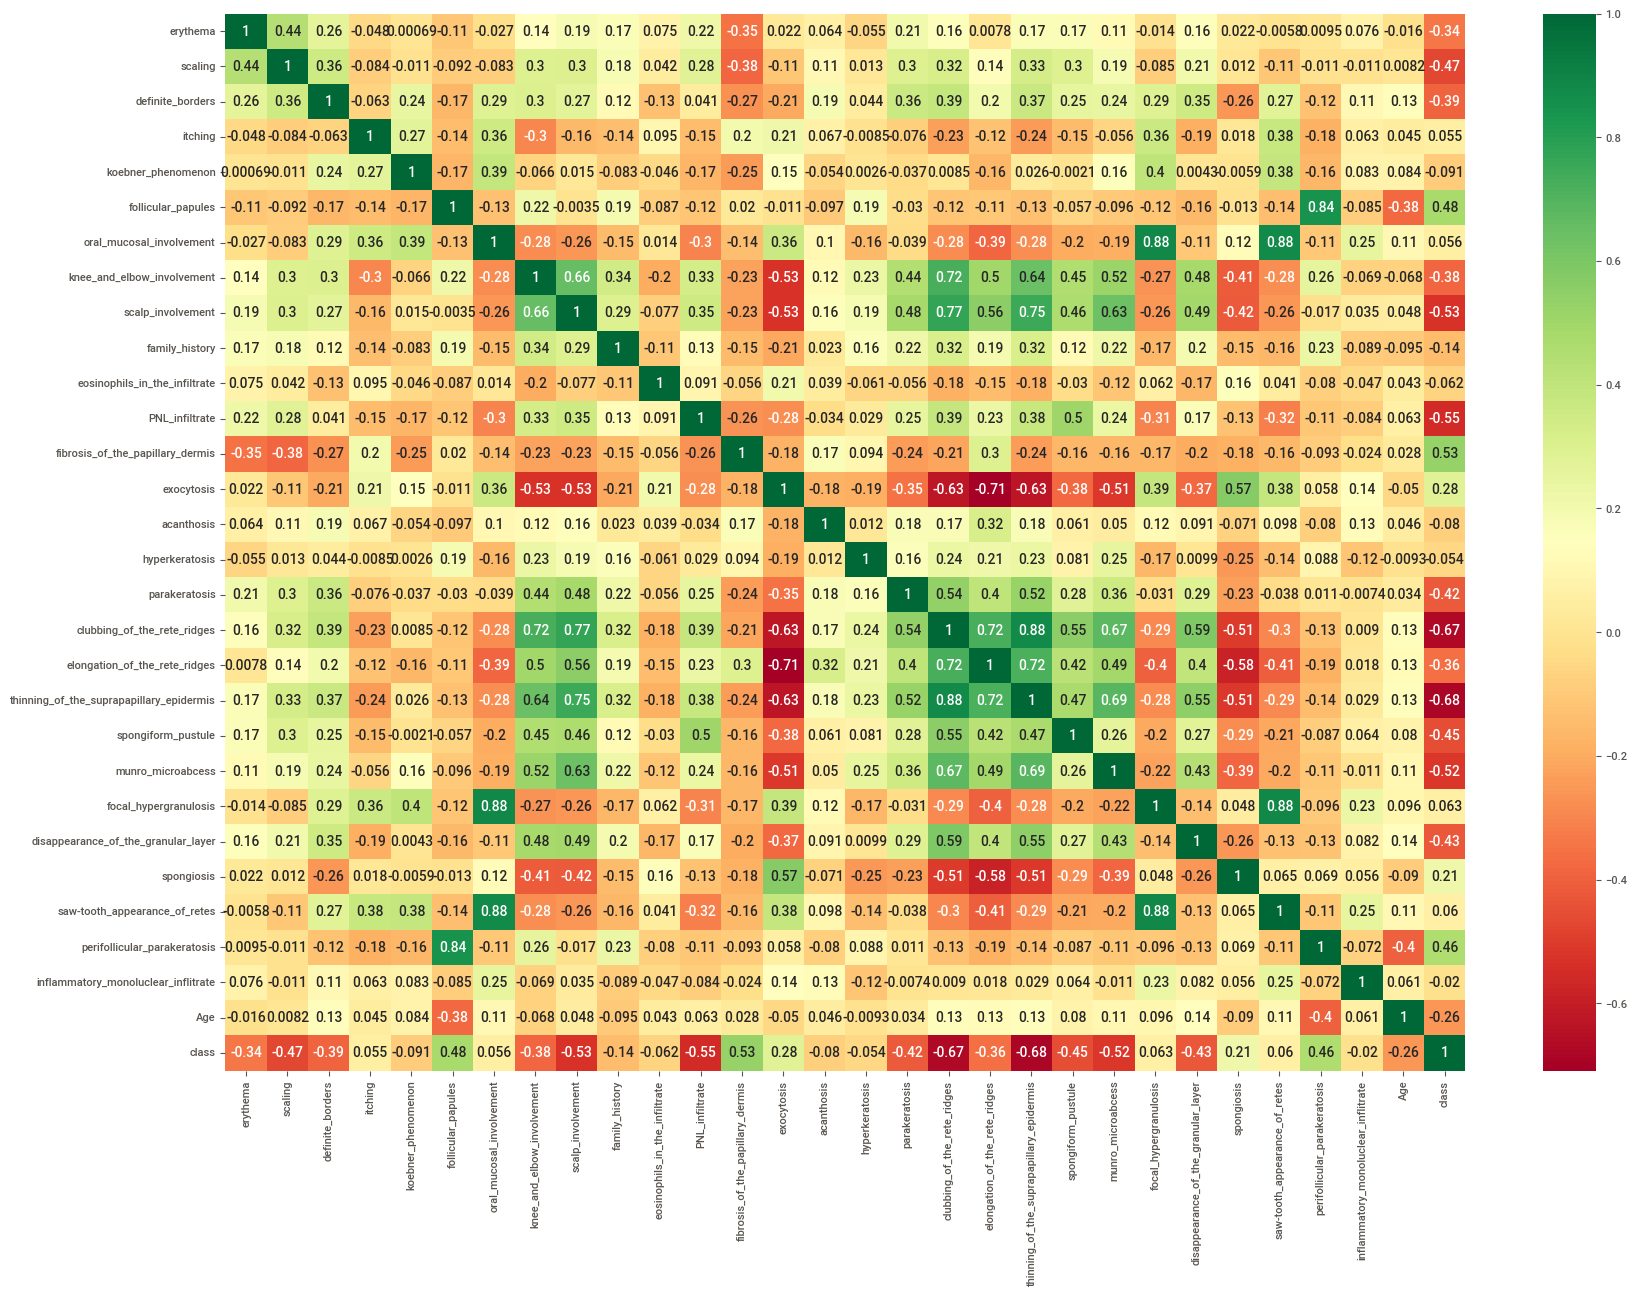

In [43]:
# lets check heat map after dropping features
plt.figure(figsize=(20,14))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

In [44]:
# lets check the duplicated data
data.duplicated().sum()

0

# Model Selection

In [45]:
# lets create X and y 
X=data.drop('class', axis=1)
y= data['class']

In [46]:
# print the shape
print(X.shape)
print(y.shape)

(366, 29)
(366,)


### Data balancing and Scaling is reducing the performance of Logistic regression, Decisiontree, RandomForest & Naive Bayes models, so i have created these models without scaling the data and done only data balancing

In [47]:
# Lets split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=16, test_size=0.2)

In [48]:
print(X_train.shape)
print(X_test.shape)

(292, 29)
(74, 29)


### Data Balancing

In [49]:
# lets check the target class distribution
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [50]:
# lets balance the data, as data is imbalanced

from imblearn.over_sampling import SMOTE
balance=SMOTE()
X_bal,y_bal=balance.fit_resample(X_train,y_train)

# Logistic Regression

In [51]:
# import the logistic regression model and train it
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression(random_state=42)
Lr.fit(X_bal,y_bal)

LogisticRegression(random_state=42)

In [52]:
# lets predict and evaluate the model
y_pred=Lr.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        13
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [53]:
# lets check confusion matrix for test and test_prediction
pd.crosstab(y_test,y_pred)

col_0   1   2   3   4  5  6
class                      
1      21   0   0   0  0  0
2       0  11   0   1  0  0
3       0   0  13   0  0  0
4       0   0   0  14  0  0
5       0   0   0   0  9  0
6       0   0   0   0  0  5

In [54]:
# lets check training data performance
y_pred_train=Lr.predict(X_bal)
print(classification_report(y_bal,y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       0.98      0.98      0.98        91
           3       1.00      1.00      1.00        91
           4       0.98      0.98      0.98        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



In [55]:
pd.crosstab(y_test,y_pred)

col_0   1   2   3   4  5  6
class                      
1      21   0   0   0  0  0
2       0  11   0   1  0  0
3       0   0  13   0  0  0
4       0   0   0  14  0  0
5       0   0   0   0  9  0
6       0   0   0   0  0  5

#### Model performing(recall for all Classes) good with training and testing data aswell, lets check with cross validation score

### Logistic RegressionCV

In [56]:
# import the logistic regression model and train it
from sklearn.linear_model import LogisticRegressionCV
LrCV=LogisticRegressionCV(cv=5, random_state=16)
LrCV.fit(X_bal,y_bal)

LogisticRegressionCV(cv=5, random_state=16)

In [57]:
# lets predict and evaluate the model
y_pred_cv=LrCV.predict(X_test)

print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        13
           4       0.93      0.93      0.93        14
           5       1.00      1.00      1.00         9
           6       0.83      1.00      0.91         5

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74



In [58]:
# lets check training data performance
y_pred_train_cv=LrCV.predict(X_bal)
print(classification_report(y_bal,y_pred_train_cv))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       0.97      0.96      0.96        91
           3       1.00      1.00      1.00        91
           4       0.96      0.97      0.96        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



In [59]:
# lets check confusion matrix for test and test_prediction
pd.crosstab(y_test,y_pred_cv)

col_0   1   2   3   4  5  6
class                      
1      21   0   0   0  0  0
2       0  10   0   1  0  1
3       0   0  13   0  0  0
4       0   1   0  13  0  0
5       0   0   0   0  9  0
6       0   0   0   0  0  5

#### Model  performing good with Lr model, and recall for all the skin disease is performing good, with Logistic regression & cross validation peroforming well

# DecisionTree Classifier

In [60]:
# import and train Decisiontreeclassifier model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_bal,y_bal)

DecisionTreeClassifier(random_state=42)

In [61]:
# predict the model for test data
y_pred_dt=dt.predict(X_test)

# evalution of the model
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.83      0.91        12
           3       0.93      1.00      0.96        13
           4       0.87      0.93      0.90        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.96        74
   macro avg       0.97      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



In [62]:
# lets check the model training performance
y_pred_dt_train=dt.predict(X_bal)
print(classification_report(y_bal,y_pred_dt_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



* we can see that model got overfitted with training data

In [63]:
# hyper parameter tuning for Decision tree
params_dt={ 'criterion' : ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth' : [10,15,20,50,60,70],
        'min_samples_split' : [2,3,4,5,6,7,10,20,30],
        'min_samples_leaf' : [1,2,3,4,5,6,7],
           'max_leaf_nodes': [10,20,50,60,70,90] 
}

# lets check best parameters using gridSearchCV

from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(DecisionTreeClassifier(random_state=16), params_dt, verbose=1,cv=3,scoring='f1',n_jobs=1)
dt_grid.fit(X_bal,y_bal)

# getting best fit parameters
print(dt_grid.best_params_)

Fitting 3 folds for each of 9072 candidates, totalling 27216 fits
{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


* 1st attempt: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
* 2nd attempt:'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'
* 3rd attempt: 'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'

In [64]:
# lets train the mdoel with tuned hyperparameters
dt_tuned=DecisionTreeClassifier(splitter='best',min_samples_split=2,max_leaf_nodes=10,min_samples_leaf=1,max_depth=10,criterion='gini')
dt_tuned.fit(X_bal,y_bal)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)

In [65]:
# predicting and evoluating test data
y_pred_dtun=dt_tuned.predict(X_test)
print(classification_report(y_test,y_pred_dtun))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.83      0.91        12
           3       0.93      1.00      0.96        13
           4       0.87      0.93      0.90        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.96        74
   macro avg       0.97      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



In [66]:
# lets check model performance with training data
y_pred_dtun_train=dt_tuned.predict(X_bal)
print(classification_report(y_bal,y_pred_dtun_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       0.97      0.95      0.96        91
           3       1.00      0.99      0.99        91
           4       0.95      0.97      0.96        91
           5       1.00      1.00      1.00        91
           6       0.99      1.00      0.99        91

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546



#### Model performance not got improved but model not got overfitted with hyper perameter tuning.performing good with recall for all skin diseases

# RandomForest classifier model

In [67]:
# import and ensemble RandomForestCLaasifier model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)

# fitting the data to model
rf.fit(X_bal,y_bal)

RandomForestClassifier(random_state=42)

In [68]:
# lets predict and evoluate the model
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        13
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [69]:
# lets test the model performance for training data
y_pred_train_rf=rf.predict(X_bal)
print(classification_report(y_bal,y_pred_train_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



In [70]:
# Hyperperameter tuning using RandomisedSearch CV

params={ 'n_estimators': [10,20,30,40,50,60,70],
        'max_features' : ['auto', 'sqrt'],
        'max_depth' : [10,20,30,35,40,50,60],
        'min_samples_split' : [3,4,5,6,7,8,9],
        'min_samples_leaf' : [1, 2,3,4,5,6],
        'bootstrap' : [True, False]
    
}
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=RandomForestClassifier(random_state=16),param_grid=params,cv=3,
                           verbose=1,n_jobs=-1)

# fitting model

rf_grid.fit(X_bal,y_bal)
print(rf_grid.best_params_)

Fitting 3 folds for each of 8232 candidates, totalling 24696 fits
{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 70}


* 1st attempt:'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50
* 2nd attempt: bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 30
* 3rd time: 'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 70
* 4th time(out_lier_treated): 'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 60
* outlier_not_treated:bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 70

In [71]:
# lets create model with new paramets and then fit the model
rf_new=RandomForestClassifier(bootstrap= True, max_depth=20,max_features='auto',min_samples_leaf=1,min_samples_split=3,n_estimators=70)
rf_new.fit(X_bal,y_bal)

RandomForestClassifier(max_depth=20, max_features='auto', min_samples_split=3,
                       n_estimators=70)

In [72]:
# lets predict and evoluate the model
y_pred_rf_new=rf_new.predict(X_test)
print(classification_report(y_test,y_pred_rf_new))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.83      0.91        12
           3       0.93      1.00      0.96        13
           4       0.87      0.93      0.90        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.96        74
   macro avg       0.97      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



In [73]:
# lets check model performance with training data
y_pred_rf_new_train=rf_new.predict(X_bal)
print(classification_report(y_bal,y_pred_rf_new_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



#### Model performance not got improved after doing hyper peramter tuning,Recall for the class is same. And performing better than LogisticregressionCV and Decision treeClassifier with default perameters 

# Naive Bayes Model

In [74]:
# lets import the model and fit the model
from sklearn.naive_bayes import BernoulliNB

nb=BernoulliNB()

# fitting model
nb.fit(X_bal,y_bal)

BernoulliNB()

In [75]:
# lets predict the target
y_pred_nb=nb.predict(X_test)

# evaluting the model
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        13
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [76]:
# lets predict and evaluete the training data
y_pred_nb_train=nb.predict(X_bal)

# evaluting the model
print(classification_report(y_bal,y_pred_nb_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       0.96      0.96      0.96        91
           3       1.00      1.00      1.00        91
           4       0.96      0.96      0.96        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



#####  model performing good with BernoulliNB model and it is equal performing with Randomforestclassifier

## Data balancing and scaling has improved the model performance with SVM and KNN, so i have created these models with balanced and scaled data

### Scaling Only Continuous features('Age')

##### Training and testing data scaling

In [77]:
X_bal1=X_bal.copy()
X_test1=X_test.copy()

In [78]:
# lets scale the continuous features('Age') for Balanced data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_bal1['Age']=scale.fit_transform(pd.DataFrame(X_bal['Age']))

In [79]:
# testing data scaling
X_test1['Age']=scale.transform(pd.DataFrame(X_test['Age']))

# SVM model

In [80]:
# lets import the svm model , fit and predict the model
from sklearn.svm import SVC
svm=SVC( random_state=16)

# fit the model

svm.fit(X_bal1,y_bal)

SVC(random_state=16)

In [81]:
# lets predict the target with the SVM model and evalute the model
y_pred_svm=svm.predict(X_test1)

# model evoluation

print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [82]:
# lets predict the training data and evalute the model
y_pred_train_svm=svm.predict(X_bal1)

# model evoluation

print(classification_report(y_bal,y_pred_train_svm))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       0.99      0.95      0.97        91
           3       1.00      1.00      1.00        91
           4       0.95      0.99      0.97        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



In [83]:
# lets do hyper parameter tuning using GridsearchCV
params= { 'C': [0.05,0.01,0.08,0.1],
        'gamma':[3,2,1.5,1, 0.1,0.05]}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(random_state=16), params, refit=True,cv=3,scoring='f1')

# fitting model 
grid.fit(X_bal1,y_bal)

# printing best fit parameters
print( grid.best_params_)

{'C': 0.05, 'gamma': 3}


* 1st best params:{'C': 0.1, 'gamma': 1}
* 2nd time best params: {'C': 0.05, 'gamma': 1.5}
* 3rd time best params:{'C': 0.05, 'gamma': 3}

##### though we get best parametets from GridSearchCV, it is performing better with C=0.1, gamma=0.1

In [84]:
# lets create the model with new parameters
svm_new=SVC(C=0.1,gamma=0.1)

# fitting the model
svm_new.fit(X_bal1,y_bal)

SVC(C=0.1, gamma=0.1)

In [85]:
# lets predict the target with the new SVM model and evalute the model
y_pred_svm_new=svm_new.predict(X_test1)

# model evoluation

print(classification_report(y_test,y_pred_svm_new))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        13
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [86]:
print(pd.crosstab(y_test,y_pred_svm_new))

col_0   1   2   3   4  5  6
class                      
1      21   0   0   0  0  0
2       0  12   0   0  0  0
3       0   0  13   0  0  0
4       0   1   0  13  0  0
5       0   0   0   0  9  0
6       0   0   0   0  0  5


### SVM Model performance best with deafult perameters with 100% accuracy and recall for all target classes

# KNearest Neighbor model

In [87]:
# lets find the error rate for different 'k' values so that we can plot and find the best 'k'
error_rate=[]

for i in range(1,11):
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_bal1,y_bal)
    y_pred_knn=knn.predict(X_test1)
    error_rate.append(np.mean(y_pred_knn != y_test))

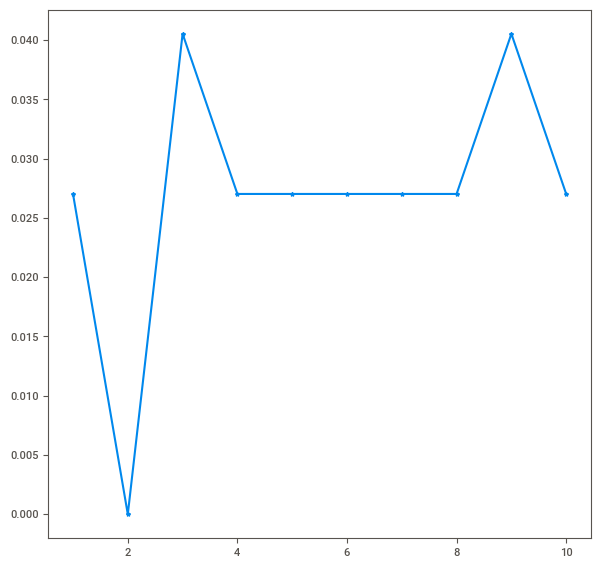

In [88]:
# plot the graph to find the best fit 'k' value
plt.figure(figsize=(7,7))
plt.plot(np.arange(1,11),error_rate, marker='*')

In [89]:
# lets take k=5 and start predicting the model
knn_f=KNeighborsClassifier(n_neighbors=5)
knn_f.fit(X_bal1,y_bal)

# lets predict the target and evalute the model
y_pred_knn_f=knn_f.predict(X_test1)

# model evoluation

print(classification_report(y_test,y_pred_knn_f))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        13
           4       0.88      1.00      0.93        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.97        74
   macro avg       0.98      0.97      0.97        74
weighted avg       0.98      0.97      0.97        74



In [90]:
# lets check model performance for the training data
y_pred_train_knn_f=knn_f.predict(X_bal1)
print(classification_report(y_bal,y_pred_train_knn_f))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        91
           2       1.00      0.97      0.98        91
           3       1.00      1.00      1.00        91
           4       0.96      1.00      0.98        91
           5       1.00      0.99      0.99        91
           6       0.99      1.00      0.99        91

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



#### model performing good but not better than SVM,Randomforest and Naivebayes

# Bagging

### Bagging using Logistic Regression

In [91]:
# import the model and fit the model

from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator= Lr, n_estimators=20, random_state=16)

# fitting the model
bag.fit(X_bal,y_bal)

# predicting and evoluting

y_pred_bag=bag.predict(X_test)
print(classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [92]:
# predicting and evoluting training data

y_pred_bag_train=bag.predict(X_bal)
print(classification_report(y_bal,y_pred_bag_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       0.97      0.98      0.97        91
           3       1.00      1.00      1.00        91
           4       0.98      0.97      0.97        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



##### Model performing better than Logistic regreesion and RF,NB and KNN. outperformed with 100% accuracy and recall for all target classes

### Bagging using KNNeighbors

In [93]:
# lets create the model
bag_kn=BaggingClassifier(base_estimator= knn_f, n_estimators=40, random_state=16)

# fit the model
bag_kn.fit(X_bal1,y_bal)

# predicting and evoluting

y_pred_bagkn=bag_kn.predict(X_test1)
print(classification_report(y_test,y_pred_bagkn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.75      0.86        12
           3       1.00      1.00      1.00        13
           4       0.82      1.00      0.90        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.96        74
   macro avg       0.97      0.96      0.96        74
weighted avg       0.97      0.96      0.96        74



In [94]:
# predicting and evoluting training data

y_pred_bagkn_train=bag_kn.predict(X_bal1)
print(classification_report(y_bal,y_pred_bagkn_train))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        91
           2       1.00      0.97      0.98        91
           3       1.00      1.00      1.00        91
           4       0.97      1.00      0.98        91
           5       1.00      1.00      1.00        91
           6       0.99      1.00      0.99        91

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



##### performing not improved compared to KNN

### Bagging using SVM

In [95]:
# lets create the model
bag_svm=BaggingClassifier(base_estimator= svm, n_estimators=20, random_state=16)

# fit the model
bag_svm.fit(X_bal1,y_bal)

# predicting and evoluting

y_pred_bagsvm=bag_svm.predict(X_test1)
print(classification_report(y_test,y_pred_bagsvm))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        13
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [96]:
# predicting and evoluting training data

y_pred_bagsvm_train=bag_svm.predict(X_bal1)
print(classification_report(y_bal,y_pred_bagsvm_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       0.99      0.93      0.96        91
           3       1.00      1.00      1.00        91
           4       0.94      0.99      0.96        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



#### performance gone down compared to SVMClassifier

# Gradient Boosting Classifier

In [97]:
# lets import the model from scikit learn, train and test the model
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

# fitting the model

gb.fit(X_bal,y_bal)


GradientBoostingClassifier()

In [98]:
# predict and evaluting the model

y_pred_gb=gb.predict(X_test)

# evalution

print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.83      0.91        12
           3       0.93      1.00      0.96        13
           4       0.87      0.93      0.90        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5

    accuracy                           0.96        74
   macro avg       0.97      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



In [99]:
# checking training of the model

y_pred_train_gb = gb.predict(X_bal)
print(classification_report(y_bal,y_pred_train_gb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



##### performance not better than SVM, RF & NB

# AdaBoostClassifier

In [100]:
from sklearn.ensemble import AdaBoostClassifier
agc=AdaBoostClassifier()

# lets fit the model
agc.fit(X_bal,y_bal)


AdaBoostClassifier()

In [101]:
# predict and evaluting the model

y_pred_agc=agc.predict(X_test)

# evalution

print(classification_report(y_test,y_pred_agc))

              precision    recall  f1-score   support

           1       0.46      1.00      0.63        21
           2       0.00      0.00      0.00        12
           3       0.93      1.00      0.96        13
           4       0.00      0.00      0.00        14
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00         5

    accuracy                           0.58        74
   macro avg       0.40      0.50      0.43        74
weighted avg       0.41      0.58      0.47        74



In [102]:
# checking training of the model

y_pred_train_agc = gb.predict(X_bal)
print(classification_report(y_bal,y_pred_train_agc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        91
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



##### model performing bad with AdaboostClassifier

# XGBoostClassifier

In [103]:
# lets import and train the model
import xgboost
# model creation
from xgboost import XGBClassifier
xgb=XGBClassifier()

# since from 1.3.2 version XGB expects target to start from 0 , i will encode original y_bal
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_bal_new=pd.DataFrame(le.fit_transform(y_bal))
y_train_new=pd.DataFrame(le.fit_transform(y_train))

# fit the model
xgb.fit(X_bal,y_bal_new)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [104]:
# lets change labels of testing data aswell
y_test_new=pd.DataFrame(le.fit_transform(y_test))

In [105]:
# predict and evaluting the model

y_pred_xgb=xgb.predict(X_test)

# evalution

print(classification_report(y_test_new,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.92      0.96        12
           2       0.93      1.00      0.96        13
           3       0.93      0.93      0.93        14
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         5

    accuracy                           0.97        74
   macro avg       0.98      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



In [106]:
# predict and evaluting the model

y_pred_xgb_train=xgb.predict(X_bal)

# evalution

print(classification_report(y_bal_new,y_pred_xgb_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        91
           5       1.00      1.00      1.00        91

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



In [107]:
# create the dictionary of parameters

param={'gamma' : [0.05,0.1,0.5,1],
      "learning_rate": [0.01,0.05,0.1,0.3,0.5],
       'max_depth':[10,15,20,25],
       'n_estimators':[50,60,70,80,90,100],
       'reg_alpha': [0.1,0.5,1,1.2,1.5,2],
       'reg_lambda': [0.1,0,3,0.5,1,1.5,2]
      }

from sklearn.model_selection import RandomizedSearchCV

rcv= RandomizedSearchCV( estimator = XGBClassifier(random_state=16),scoring='f1',param_distributions=param, n_iter=100,
                        cv=3,verbose=1,n_jobs=1, random_state=42)

# fit the rcv

rcv.fit(X_bal,y_bal_new)

print(rcv.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 90, 'max_depth': 20, 'learning_rate': 0.01, 'gamma': 1}


In [109]:
# create the model with new hyper parameters and fit data

xgb_tun=XGBClassifier(reg_lambda=0.5, reg_alpha=0.1,n_estimators=90,max_depth=20,learning_rate=0.01, gamma=1 )

# fit the model
xgb_tun.fit(X_bal,y_bal_new)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0.1, ...)

In [110]:
# predict and evaluting the model

y_pred_xgb_tun=xgb_tun.predict(X_test)

# evalution

print(classification_report(y_test_new,y_pred_xgb_tun))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.83      0.91        12
           2       0.93      1.00      0.96        13
           3       0.87      0.93      0.90        14
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         5

    accuracy                           0.96        74
   macro avg       0.97      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



In [111]:
# predict and evaluting the model

y_pred_xgbtun_train=xgb_tun.predict(X_bal)

# evalution

print(classification_report(y_bal_new,y_pred_xgbtun_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.99      0.99      0.99        91
           2       1.00      0.99      0.99        91
           3       0.99      0.99      0.99        91
           4       1.00      1.00      1.00        91
           5       0.99      1.00      0.99        91

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546



##### model performance not got improved after hyper perameter tuning, performing better with default parameters only

## Comparison Report

In [254]:

LRCV=pd.DataFrame(classification_report(y_test,y_pred_cv,output_dict=True)).astype('float').round(2).iloc[1,:7]
DT=pd.DataFrame(classification_report(y_test,y_pred_dtun,output_dict=True)).astype('float').round(2).iloc[1,:7]
Rf=pd.DataFrame(classification_report(y_test,y_pred_rf,output_dict=True)).astype('float').round(2).iloc[1,:7]
NB=pd.DataFrame(classification_report(y_test,y_pred_nb,output_dict=True)).astype('float').round(2).iloc[1,:7]
SVM=pd.DataFrame(classification_report(y_test,y_pred_svm,output_dict=True)).astype('float').round(2).iloc[1,:7]
KNN=pd.DataFrame(classification_report(y_test,y_pred_knn_f,output_dict=True)).astype('float').round(2).iloc[1,:7]
bg_lr=pd.DataFrame(classification_report(y_test,y_pred_bag,output_dict=True)).astype('float').round(2).iloc[1,:7]
bg_knn=pd.DataFrame(classification_report(y_test,y_pred_bagkn,output_dict=True)).astype('float').round(2).iloc[1,:7]
bg_svm=pd.DataFrame(classification_report(y_test,y_pred_bagsvm,output_dict=True)).astype('float').round(2).iloc[1,:7]
gb=pd.DataFrame(classification_report(y_test,y_pred_gb,output_dict=True)).astype('float').round(2).iloc[1,:7]
model={'LogisticRCV':LRCV,'Decision_tree':DT,'Random_forest':Rf,
       'NaiveBayes':NB,'SVM':SVM,'KNN':KNN,'bagging_LR':bg_lr,'bagging_knn':bg_knn,'bagging_svm':bg_svm,'GB':gb}
com_col=['1','2','3','4','5','6','accuracy']
comparison=pd.DataFrame(data=model, index=com_col)

In [255]:
comparison

LogisticRCV  Decision_tree  Random_forest  NaiveBayes  SVM  KNN  \
1                 1.0            1.0            1.0         1.0  1.0  1.0   
2                0.83           0.83           0.92        0.92  1.0 0.83   
3                 1.0            1.0            1.0         1.0  1.0  1.0   
4                0.93           0.93            1.0         1.0  1.0  1.0   
5                 1.0            1.0            1.0         1.0  1.0  1.0   
6                 1.0            1.0            1.0         1.0  1.0  1.0   
accuracy         0.96           0.96           0.99        0.99  1.0 0.97   

          bagging_LR  bagging_knn  bagging_svm   GB  
1                1.0          1.0          1.0  1.0  
2                1.0         0.75          1.0 0.83  
3                1.0          1.0          1.0  1.0  
4                1.0          1.0         0.93 0.93  
5                1.0          1.0          1.0  1.0  
6                1.0          1.0          1.0  1.0  
accuracy         1.0         0.96         0.99 0.96

# Summary:
### out of all models SVM has out performed with 100% accuracy and 100% Recall for all the skin diseases, after SVM model Naivebayes and Random forest models performed good with 99%-accuracy and 100% Recall for classes-1,3,4,5&6 and 92% recall for class-2